<img src="https://drive.google.com/uc?id=1SOzRTjUt7cuBJpSqoK90fcAiKBrnpUJo" width="400">

**Curso:** Doutorado em Informática Aplicada <br>
**Disciplina:** Pesquisa Operacional <br>
**Código/Turma:** P592 2024.1 <br>
**Professor:** Plácido Pinheiro <br>
**Data:** 15/03/24 <br>
**Aluno(a):** Ricardo Carubbi <br>
**Matrícula:** 2418944-9 <br>

## Instalação do pacote

In [1]:
%pip install ortools

## Carregamento dos pacotes

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from ortools.linear_solver import pywraplp
from scipy.optimize import minimize

## Questão 01

Uma companhia de aluguel de caminhões possuía-os de dois tipos: o tipo A com 2 metros cúbicos de espaço refrigerado e 4 metros cúbicos de espaço não refrigerado e o tipo B com 3 metros cúbicos refrigerados e 3 não refrigerados. Uma fábrica precisou transportar 90 metros cúbicos de produto refrigerado e 120 metros cúbicos de produto não refrigerado. Quantos caminhões de cada tipo ela deve alugar, de modo a minimizar o custo, se o aluguel do caminhão A era \$0,30 por km e o do B, \$0,40 por km. Elabore o modelo de programação linear, solucione graficamente e interpreta as folgas ou excessos.

In [3]:
def main():
    """Este modelo implemeenta a questão 01 da lista de exercícios de PO.

    Variáveis:
    - x: número de caminhões do tipo A a serem alugados.
    - y: número de caminhões do tipo B a serem alugados.

    Restrições:
    - 2x + 3y ​>= 90.
    - 4x + 3y >= 120.
    - x, y >= 0

    Função objetivo (Minimização):
    - custo = 0.30x + 0.40y
    """

    # Instancia do solucionador para otimização de inteiros (SAT).
    solver = pywraplp.Solver.CreateSolver("SAT")
    if not solver:
        return

    # Cria duas variáveis ​​com valores não negativos.
    x = solver.NumVar(0, solver.infinity(), "x")
    y = solver.NumVar(0, solver.infinity(), "y")

    print("Número de variáveus =", solver.NumVariables())

    # Restrição 1.
    solver.Add(2 * x + 3 * y >= 90)

    # Restrição 2.
    solver.Add(4 * x + 3 * y >= 120)

    print("Número de restrições =", solver.NumConstraints())

    # Função objetivo.
    solver.Minimize(.3 * x + .4 * y)

    # Solver do sistema.
    print(f"Resolvendo com {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("\nSolução:")
        print(f"x = {x.solution_value():0.1f}")
        print(f"y = {y.solution_value():0.1f}")
        print(f"Valor objetivo = {solver.Objective().Value():0.1f}")
    else:
        print("O problema não tem solução ótima!")

    print("\nProcessamento:")
    print(f"Problema resolvido em {solver.wall_time():d} milisegundos")
    print(f"Problema resolvido em {solver.iterations():d} iterações")


if __name__ == "__main__":
    main()

Número de variáveus = 2
Número de restrições = 2
Resolvendo com CP-SAT solver v9.9.3963

Solução:
x = 15.0
y = 20.0
Valor objetivo = 12.5

Processamento:
Problema resolvido em 27 milisegundos
Problema resolvido em 0 iterações


In [4]:
# Restrição para o transporte refrigerado
def refrigerado(x):
    return (90 - 2*x) / 3  # 2x + 3y >= 90

# Restrição para o transporte não refrigerado
def nao_refrigerado(x):
    return (120 - 4*x) / 3  # 4x + 3y >= 120

if __name__ == "__main__":
    # Folgas
    print(f"Folga para o transporte refrigerado: {20 - refrigerado(15)}")
    print(f"Folga para o transporte refrigerado: {20 - nao_refrigerado(15)}")

Folga para o transporte refrigerado: 0.0
Folga para o transporte refrigerado: 0.0


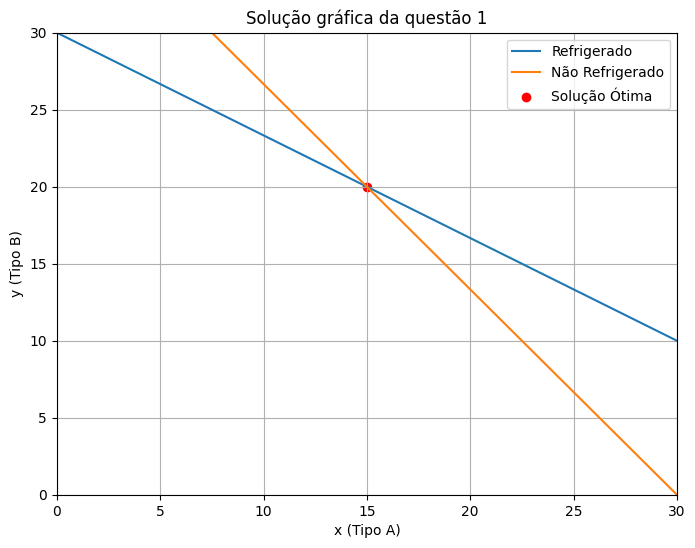

In [5]:
# Intervalo de valores para x
x = np.linspace(0, 50, 400)

# Gráfico das funções de restrição
plt.figure(figsize=(8, 6))
plt.plot(x, refrigerado(x), label="Refrigerado")
plt.plot(x, nao_refrigerado(x), label="Não Refrigerado")

# Adicionar a solução ótima ao gráfico
plt.scatter(15, 20, color="red", label="Solução Ótima")

# Configurações do gráfico
plt.xlabel("x (Tipo A)")
plt.ylabel("y (Tipo B)")
plt.title("Solução gráfica da questão 1")
plt.legend()
plt.grid(True)
plt.xlim(0, 30)
plt.ylim(0, 30)

# Mostra o gráfico
plt.show()

## Questão 02

Uma companhia fabrica dois produtos P1 e P2 que utilizam os mesmos recursos produtivos: matéria prima, forja e polimento. Cada unidade de P1 exige 4 horas de forjaria, 2 h de polimento e utiliza 100 unidades de matéria-prima. Cada unidade de P2 requer 2 horas de forjaria, 3 h de polimento e 200 unidades de matéria-prima. O preço de venda de P1 é 1.900 u.m. e de P2, 2.100 u.m. Toda produção tem mercado garantido. As disponibilidades são de: 20 h de forja; 10 h de polimento e 500 unidades de matéria-prima, por dia. Elabore o modelo linear para o problema, apresente uma solução gráfica e interpreta as folgas ou excessos.

In [6]:
def main():
    """Este modelo implemeenta a questão 02 da lista de exercícios de PO.

    Variáveis:
    - x: quantidade de unidades do produto P1.
    - y: quantidade de unidades do produto P2.

    Restrições:
    - 4x + 2y <= 20 (forjaria).
    - 2x + 3y <= 10 (polimento).
    - 100x + 200y <= 500 (matéria-prima)
    - x, y >= 0

    Função objetivo (maximização):
    - receita = 1900x + 2100y
    """

    # Instancia do solucionador para otimização de inteiros (SAT).
    solver = pywraplp.Solver.CreateSolver("SAT")
    if not solver:
        return

    # Cria duas variáveis ​​com valores não negativos.
    x = solver.NumVar(0, solver.infinity(), "x")
    y = solver.NumVar(0, solver.infinity(), "y")

    print("Número de variáveis =", solver.NumVariables())

    # Restrição 1 - Forjaria.
    solver.Add(4 * x + 2 * y <= 20.0)

    # Restrição 2 - Polimento.
    solver.Add(2 * x + 3 * y <= 10.0)

    # Restrição 3 - Matéria-prima.
    solver.Add(100 * x + 200 * y <= 500.0)

    print("Número de restrições =", solver.NumConstraints())

    # Função objetivo.
    solver.Maximize(1900 * x + 2100 * y)

    # Solver do sistema.
    print(f"Resolvendo com {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("\nSolução:")
        print(f"x = {x.solution_value():0.1f}")
        print(f"y = {y.solution_value():0.1f}")
        print(f"Valor objetivo = {solver.Objective().Value():0.1f}")
    else:
        print("O problema não tem solução ótima!")

    print("\nProcessamento:")
    print(f"Problema resolvido em {solver.wall_time():d} milisegundos")
    print(f"Problema resolvido em {solver.iterations():d} iterações")


if __name__ == "__main__":
    main()

Número de variáveis = 2
Número de restrições = 3
Resolvendo com CP-SAT solver v9.9.3963

Solução:
x = 5.0
y = 0.0
Valor objetivo = 9500.0

Processamento:
Problema resolvido em 10 milisegundos
Problema resolvido em 0 iterações


In [7]:
# Restrição para a forjaria
def forjaria(x):
    return (20 - 4*x) / 2  # 4x + 2y <= 20

# Restrição para o polimento
def polimento(x):
    return (10 - 2*x) / 3  # 2x + 3y <= 10

# Restrição para a materia_prima
def materia_prima(x):
    return (500 - 100*x) / 200  # 100x + 200y <= 500

if __name__ == "__main__":
    # Folgas
    print(f"Folga de produtos na forjaria: {forjaria(5)} produtos")
    print(f"Folga polimento: {polimento(5)} produtos")
    print(f"Folga materia-prima: {materia_prima(5)} produtos")

Folga de produtos na forjaria: 0.0 produtos
Folga polimento: 0.0 produtos
Folga materia-prima: 0.0 produtos


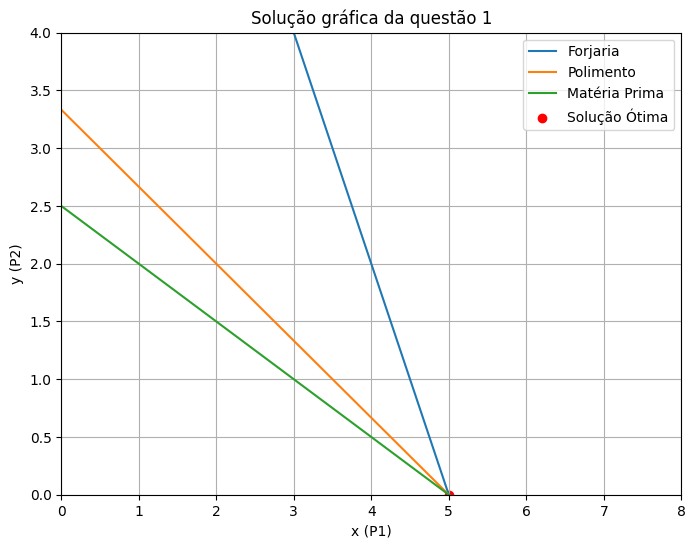

In [8]:
# Intervalo de valores para x
x = np.linspace(0, 50, 400)

# Gráfico das funções de restrição
plt.figure(figsize=(8, 6))
plt.plot(x, forjaria(x), label='Forjaria')
plt.plot(x, polimento(x), label='Polimento')
plt.plot(x, materia_prima(x), label='Matéria Prima')

# Adicionar a solução ótima ao gráfico
plt.scatter(5, 0, color="red", label="Solução Ótima")

# Configurações do gráfico
plt.xlabel('x (P1)')
plt.ylabel('y (P2)')
plt.title('Solução gráfica da questão 1')
plt.legend()
plt.grid(True)
plt.xlim(0, 8)
plt.ylim(0, 4)

# Mostra o gráfico
plt.show()

## Questão 03

Ache os valores de $x_1$ e $x_2$ que maximize a função $Z = 3x_1^2 + 5e^{-x_2}$ e sabendo-se que $x_1^2 + e^{- x_2} \leq 8$

In [9]:
# Definir a função objetivo
def objective_function(x):
    x1, x2 = x
    return - (3*x1**2 + 5*np.exp(-x2))  # Negativo para maximização

# Definir a função de restrição
def constraint(x):
    x1, x2 = x
    return x1**2 + np.exp(-x2) - 8

# Condição inicial
initial_guess = [0, 0]

# Resolver usando método de otimização com restrições
# Minimiza uma função escalar de uma ou mais variáveis ​​usando o
# algoritmo de otimização linear (COBYLA).
result = minimize(
    objective_function,
    initial_guess,
    constraints = {'type': 'eq', 'fun': constraint}
)

# Mostrar os resultados
if result.success:
    x_optimal = result.x
    z_optimal = -result.fun  # Negativo de volta para maximização
    print(f"Valor ótimo de x1: {x_optimal[0]:0.2f}")
    print(f"Valor ótimo de x2: {x_optimal[1]:0.2f}")
    print(f"Valor ótimo de Z: {z_optimal:0.2f}")
else:
    print("Não foi possível encontrar uma solução ótima.")


Valor ótimo de x1: -0.00
Valor ótimo de x2: -2.08
Valor ótimo de Z: 40.00


**Referências**
1. Powell M.J.D. (1994), “A direct search optimization method that models the objective and constraint functions by linear interpolation.”, in Advances in Optimization and Numerical Analysis, eds. S. Gomez and J-P Hennart, Kluwer Academic (Dordrecht), pp. 51-67

2. Powell M.J.D. (1998), “Direct search algorithms for optimization calculations”, Acta Numerica 7, 287-336

3. Powell M.J.D. (2007), “A view of algorithms for optimization without derivatives”, Cambridge University Technical Report DAMTP 2007/NA03

## Questão 04

Um fazendeiro está estudando a divisão de sua propriedade nas seguintes atividades produtivas: A (Arrendamento), P (Pecuária) e S (Plantio de Soja). O arrendamento destina certa quantidade de alqueires para a plantação de cana-de-açucar, a uma usina local, que se encarrega da atividade e paga aluguel da terra \$ 300,00 por alqueire por ano. A pecuária usa outra parte para a criação de gado de corte. A recuperação das pastagens requer adubação (100 kg/Alq) e irrigação (100.000 litros de água/Alq) por ano. O lucro estimado nessa atividade é de \$ 400,00 por alqueire no ano. o plantio de soja usa uma terça parte para o plantio de soja. Essa cultura requer 200 kg por alqueire de adubos e 200.000 litros de água/Alq para irrigação por ano. O lucro estimado nessa atividade é de /$ 500,00 / Alqueire no ano. Disponibilidade de recursos por ano: 12.750.000 litros de água 14.000 kg de adubo 100 alqueires de terra. Quantos alqueires deverá destinar a cada atividade para proporcionar o melhor retorno? Construa o modelo, aplicar o LINGO para solução do PPL e intérprete as folgas ou excessos.

In [10]:
def main():
    """Este modelo implemeenta a questão 04 da lista de exercícios de PO.

    Variáveis:
    - a: quantidade de quantidades de alqueires para o arrendamento.
    - p: quantidade de quantidades de alqueires para o pecuária.
    - s: quantidade de quantidades de alqueires para o plantio de soja.

    Restrições:
    - Água: 100000p + 200000s <= 12750000
    - Adubo: 100p + 200s <= 14000
    - Terra: a + p + s <= 100
    - a, p, s >= 0

    Função objetivo (maximização):
    - retorno_total = 300a ​+ 400p ​+ 500s
    """

    # Instancia do solucionador para otimização de inteiros (SAT).
    solver = pywraplp.Solver.CreateSolver("SAT")
    if not solver:
        return

    # Cria duas variáveis ​​com valores não negativos.
    a = solver.NumVar(0, solver.infinity(), "a")
    p = solver.NumVar(0, solver.infinity(), "p")
    s = solver.NumVar(0, solver.infinity(), "s")

    print("Número de variáveis =", solver.NumVariables())

    # Restrição 1 - Água.
    solver.Add(100000 * p + 200000 * s <= 12750000)

    # Restrição 2 - Adubo.
    solver.Add(100 * p + 200 * s <= 14000)

    # Restrição 3 - Terra.
    solver.Add(a + p + s <= 100)

    print("Número de restrições =", solver.NumConstraints())

    # Função objetivo.
    solver.Maximize(300 * a + 400 * p + 500 * s)

    # Solver do sistema.
    print(f"Resolvendo com {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("\nSolução:")
        print(f"a = {a.solution_value():.2f}")
        print(f"p = {p.solution_value():.2f}")
        print(f"s = {s.solution_value():.2f}")
        print(f"Valor objetivo = {solver.Objective().Value():.2f}")
    else:
        print("O problema não tem solução ótima!")

    print("\nProcessamento:")
    print(f"Problema resolvido em {solver.wall_time():d} milisegundos")
    print(f"Problema resolvido em {solver.iterations():d} iterações")


if __name__ == "__main__":
    main()

Número de variáveis = 3
Número de restrições = 3
Resolvendo com CP-SAT solver v9.9.3963

Solução:
a = 0.00
p = 73.00
s = 27.00
Valor objetivo = 42700.00

Processamento:
Problema resolvido em 6 milisegundos
Problema resolvido em 0 iterações


In [11]:
# Definir as funções de restrição
def agua(x):
    return (12750000 - 100000*x) / 200000  # 100000p + 200000s <= 12750000

def adubo(x):
    return (14000 - 100*x) / 200  # 100p + 200s <= 14000

def terra(x):
    return 100 - x  # a + p + s <= 100

if __name__ == "__main__":
    # Folgas
    print(f"Folga quantidade de água = {agua(73):.2f} litros")
    print(f"Folga quantidade de adubo = {adubo(73):.2f} kg")
    print(f"Folga quantidade de terra = {terra(73):.2f} Alq")

Folga quantidade de água = 27.25 litros
Folga quantidade de adubo = 33.50 kg
Folga quantidade de terra = 27.00 Alq


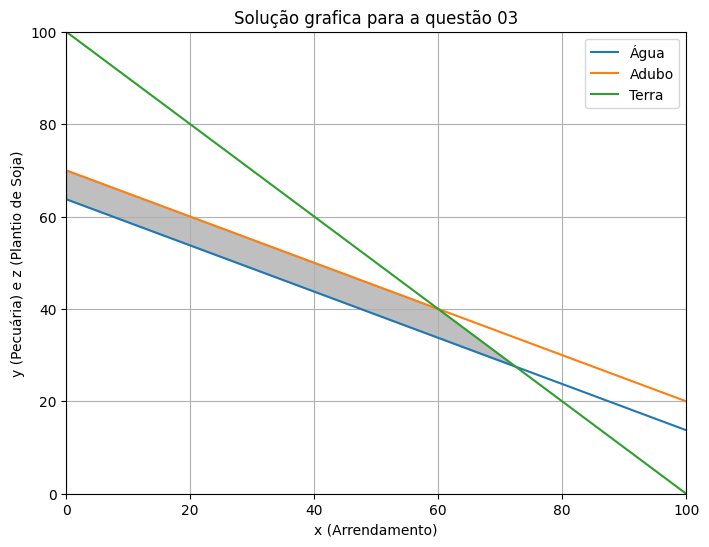

In [12]:
# Intervalo de valores para x (alqueires)
x = np.linspace(0, 100, 400)

# Criação do gráfico das funções de restrição
plt.figure(figsize=(8, 6))
plt.plot(x, agua(x), label='Água')
plt.plot(x, adubo(x), label='Adubo')
plt.plot(x, terra(x), label='Terra')

# Preenchimento da região viável
y1 = np.minimum(agua(x), adubo(x))
y2 = np.minimum(adubo(x), terra(x))
plt.fill_between(x, y1, y2, where=(y1 <= y2), color='gray', alpha=0.5)

# Configurações do gráfico
plt.xlabel('x (Arrendamento)')
plt.ylabel('y (Pecuária) e z (Plantio de Soja)')
plt.title('Solução grafica para a questão 03')
plt.legend()
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 100)

# Mostra o gráfico
plt.show()

## Questão 05

A empresa de logística Deixa Comigo S/A tem duas frotas de caminhões para realizar transportes de cargas para terceiros. A primeira frota é composta por caminhões médios e a segunda por caminhões gigantes, ambas com condições especiais para transportar sementes e grãos prontos para o consumo, como arroz e feijão. A primeira frota tem a capacidade de peso de 70.000 quilogramas e um limite de volume de 30.000 pés cúbicos, enquanto a segunda pode transportar até 90.000 quilogramas e acomodar 40.000 pés cúbicos de volume. O próximo contrato de transporte refere-se a uma entrega de até 100.000 quilogramas de sementes e 85.000 quilogramas de grãos, sendo que a Deixa Comigo S/A pode aceitar levar tudo ou somente uma parte da carga, deixando o restante para outra transportadora entregar. O volume ocupado pelas sementes é de 0,4 pé cúbico por quilograma, e o volume dos grãos é de 0,2 pé cúbico por quilograma. Sabendo que o lucro para transportar as sementes é de R$0,12 por quilograma e o lucro para transportar os grãos é de R$0,35 por quilograma. Faça a modelagem do problema com objetivo de encontrar a quantidade de quilogramas de sementes e a quantidade de quilogramas de grãos a Deixa Comigo S/A deve transportar para maximizar o seu lucro. Elabore o modelo apresente solução e intérprete as folgas ou excessos.

In [13]:
def main():
    """Este modelo implemeenta a questão 04 da lista de exercícios de PO.

    Variáveis:
    - x: quantidade de sementes (kg)
    - y: quantidade de grãos (kg)

    Restrições:
    - Capacidade de peso dos caminhões médios: x <= 70000
    - Capacidade de volume dos caminhões médios: 0.4x <= 30000
    - Capacidade de peso dos caminhões gigantes: y <= 90000
    - Capacidade de volume dos caminhões gigantes: 0.2y <= 40000
    - Demanda de sementes: x <= 100000
    - Demanda de grãos: y <= 85000

    Função objetivo (maximização do lucro Z):
    - Z = 0.12x + 0.35y
    """

    # Instancia do solucionador para otimização de inteiros (SAT).
    solver = pywraplp.Solver.CreateSolver("SAT")
    if not solver:
        return

    # Cria duas variáveis ​​com valores não negativos.
    x = solver.NumVar(0, solver.infinity(), "x")
    y = solver.NumVar(0, solver.infinity(), "y")

    print("Número de variáveis =", solver.NumVariables())

    # Restrição 1 - Capacidade de peso dos caminhões médios.
    solver.Add(x <= 70000)

    # Restrição 2 - Capacidade de volume dos caminhões médios.
    solver.Add(0.4 * x <= 30000)

    # Restrição 3 - Capacidade de peso dos caminhões gigantes.
    solver.Add(y <= 90000)

    # Restrição 4 - Capacidade de volume dos caminhões gigantes.
    solver.Add(0.2 * y <= 40000)

    # Restrição 5 - Demanda de sementes.
    solver.Add(x <= 100000)

    # Restrição 6 - Demanda de grãos.
    solver.Add(y <= 85000)

    print("Número de restrições =", solver.NumConstraints())

    # Função objetivo.
    solver.Maximize(0.12 * x + 0.35 * y)

    # Solver do sistema.
    print(f"Resolvendo com {solver.SolverVersion()}")
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        print("\nSolução:")
        print(f"x = {x.solution_value():.2f}")
        print(f"y = {y.solution_value():.2f}")
        print(f"Valor objetivo = {solver.Objective().Value():.2f}")
    else:
        print("O problema não tem solução ótima!")

    print("\nProcessamento:")
    print(f"Problema resolvido em {solver.wall_time():d} milisegundos")
    print(f"Problema resolvido em {solver.iterations():d} iterações")


if __name__ == "__main__":
    main()

Número de variáveis = 2
Número de restrições = 6
Resolvendo com CP-SAT solver v9.9.3963

Solução:
x = 70000.00
y = 85000.00
Valor objetivo = 38150.00

Processamento:
Problema resolvido em 7 milisegundos
Problema resolvido em 0 iterações


In [14]:
# Definir as funções de restrição
# Folga capacidade de peso dos caminhões médios.
def cap_peso_cmed(x):
    return 70000 - x

# Folga capacidade de volume dos caminhões médios.
def cap_vol_cmed(x):
    return 30000 - 0.4 * x

# Folga capacidade de peso dos caminhões gigantes.
def cap_peso_cgig(y):
    return 90000 - y

# Folga capacidade de volume dos caminhões gigantes.
def cap_vol_cgig(y):
    return 40000 - 0.2 * y

# Folga demanda de sementes.
def dem_sementes(x):
    return 100000 - x

# Folga demanda de grãos.
def dem_graos(y):
    return 85000 - y

if __name__ == "__main__":
    # Folgas
    print(f"Folga capacidade de peso dos caminhões médios = {cap_peso_cmed(70000):.2f} kg")
    print(f"Folga capacidade de volume dos caminhões médios = {cap_vol_cmed(70000):.2f} ft3")
    print(f"Folga capacidade de peso dos caminhões gigantes = {cap_peso_cgig(85000):.2f} kg")
    print(f"Folga capacidade de volume dos caminhões gigantes = {cap_vol_cgig(85000):.2f} ft3")
    print(f"Folga demanda de sementes = {dem_sementes(70000):.2f} kg")
    print(f"Folga demanda de grãos = {dem_graos(85000):.2f} kg")

Folga capacidade de peso dos caminhões médios = 0.00 kg
Folga capacidade de volume dos caminhões médios = 2000.00 ft3
Folga capacidade de peso dos caminhões gigantes = 5000.00 kg
Folga capacidade de volume dos caminhões gigantes = 23000.00 ft3
Folga demanda de sementes = 30000.00 kg
Folga demanda de grãos = 0.00 kg
